In [6]:
import pandas as pd

# Loading the dataset 
data = pd.read_csv("\IMDb Movies India.csv", encoding='latin1')

In [7]:
#Data Exploration
data.head(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      4999 non-null   object 
 1   Year      4840 non-null   float64
 2   Duration  2366 non-null   object 
 3   Genre     4422 non-null   object 
 4   Rating    2624 non-null   float64
 5   Votes     2624 non-null   object 
 6   Director  4856 non-null   object 
 7   Actor 1   4521 non-null   object 
 8   Actor 2   4281 non-null   object 
 9   Actor 3   4058 non-null   object 
dtypes: float64(2), object(8)
memory usage: 390.7+ KB


In [9]:
data.describe()

,Year,Rating
count,4840.000000,2624.000000
mean,-1986.684504,5.854802
std,25.304083,1.324841
min,-2022.000000,1.400000
25%,-2008.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1915.000000,9.600000


In [10]:
"""Build a model that predicts the rating of a movie based on features like genre, director, and actors. so we'll drop extra columns"""

"Build a model that predicts the rating of a movie based on features like genre, director, and actors. so we'll drop extra columns"

In [11]:
data.drop(['Name','Year','Duration', 'Votes'], axis=1, inplace=True)

In [12]:
data.head(3)

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
0,Drama,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,"Drama, Musical",NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


In [13]:
# For Data Preprocessing
data.isnull().sum()

Genre        577
Rating      2375
Director     143
Actor 1      478
Actor 2      718
Actor 3      941
dtype: int64

In [14]:
data.dropna(inplace=True)

In [15]:
# For Data Preprocessing
data.isnull().sum()

Genre       0
Rating      0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2508 entries, 1 to 4998
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Genre     2508 non-null   object 
 1   Rating    2508 non-null   float64
 2   Director  2508 non-null   object 
 3   Actor 1   2508 non-null   object 
 4   Actor 2   2508 non-null   object 
 5   Actor 3   2508 non-null   object 
dtypes: float64(1), object(5)
memory usage: 137.2+ KB


In [17]:
data.head(8)

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,"Comedy, Drama, Musical",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,"Drama, Romance, War",7.4,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,"Horror, Mystery, Thriller",5.6,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,"Action, Crime, Thriller",4.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,Drama,6.2,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,Horror,5.9,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani


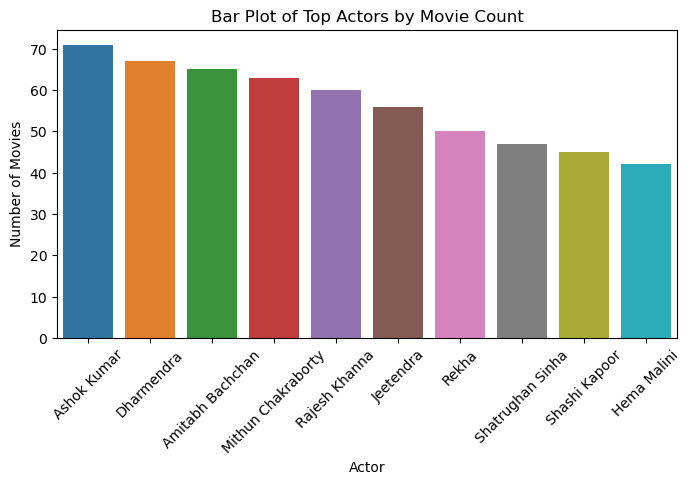

In [18]:
# Bar Plot of Top Actors by Movie Count
plt.figure(figsize=(8, 4))
top_actors = pd.concat([data['Actor 1'], data['Actor 2'], data['Actor 3']]).value_counts().head(10)
sns.barplot(x=top_actors.index, y=top_actors.values)
plt.xticks(rotation=45)
plt.title('Bar Plot of Top Actors by Movie Count')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.show()

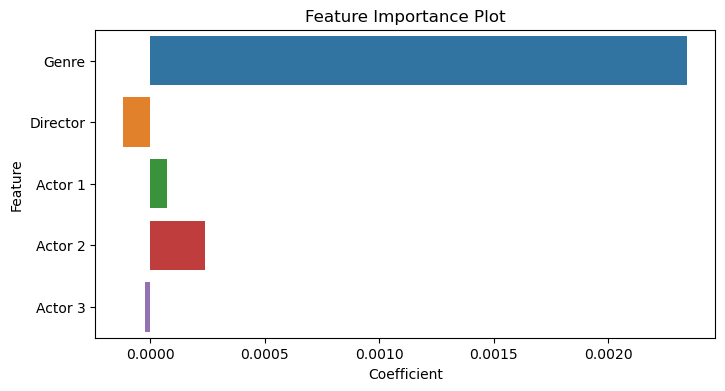

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance plot
if hasattr(model, 'coef_'):
    coef = model.coef_
    feature_names = X.columns
    plt.figure(figsize=(8, 4))
    sns.barplot(x=coef, y=feature_names)
    plt.xlabel('Coefficient')
    plt.ylabel('Feature')
    plt.title('Feature Importance Plot')
    plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding for each categorical column
data['Genre'] = label_encoder.fit_transform(data['Genre'])
data['Director'] = label_encoder.fit_transform(data['Director'])
data['Actor 1'] = label_encoder.fit_transform(data['Actor 1'])
data['Actor 2'] = label_encoder.fit_transform(data['Actor 2'])
data['Actor 3'] = label_encoder.fit_transform(data['Actor 3'])

# Print the updated DataFrame
print(data.head())

   Genre  Rating  Director  Actor 1  Actor 2  Actor 3
1    174     7.0       357      734     1243      157
3    143     4.4       787      644      402     1141
5    125     4.7       901      209       32     1092
6    220     7.4      1191      382      616     1367
8    242     5.6        71     1059      647      538


In [37]:
from sklearn.model_selection import train_test_split

# Feature selection
features = ['Genre','Director','Actor 1', 'Actor 2', 'Actor 3']
X = data[features]
y = data['Rating']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Mean squared error
mse = mean_squared_error(y_test, y_pred)

# Root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)

# R-squared score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 1.0554300488245185
Mean Squared Error (MSE): 1.7488187527884214
Root Mean Squared Error (RMSE): 1.322429110685492
R-squared (R2) Score: 0.0068640737157333875


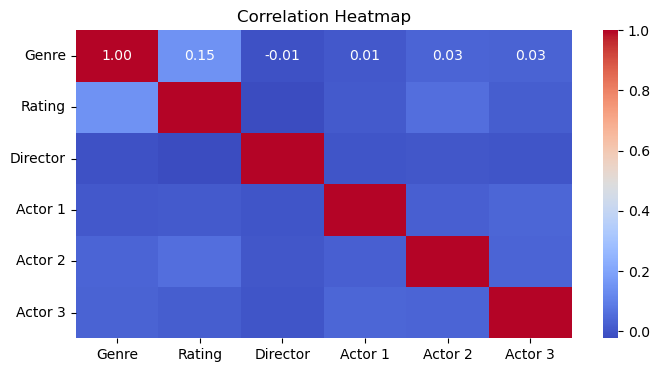

In [36]:
# Correlation heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()